## Review
### 경사하강법 (Gradient Descent)
#### 신경망 뿐만 아니라 모든 최적화 문제는 특정 상황에 대한 가장 적합한 모델을 찾는 것이고, 이는 곧 모델의 오차를 최소화(Likelihood를 최대화)하는 것을 의미한다.
#### 임의의 시작점을 주고 오차함수의 기울기가 작아지는 방향으로 조금씩 이동하는 방법을 경사하강법이라고 한다.

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad
    
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

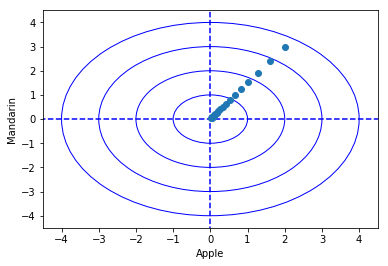

In [2]:
init_x = np.array([2.0, 3.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)


fig=plt.figure(1)
ax=fig.add_subplot(1,1,1)
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
circ=plt.Circle((0,0), radius=1, color='b', fill=False)
circ2=plt.Circle((0,0), radius=2, color='b', fill=False)
circ3=plt.Circle((0,0), radius=3, color='b', fill=False)
circ4=plt.Circle((0,0), radius=4, color='b', fill=False)
ax.add_patch(circ)
ax.add_patch(circ2)
ax.add_patch(circ3)
ax.add_patch(circ4)
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("Apple")
plt.ylabel("Mandarin")
plt.show()

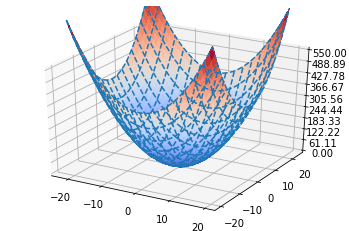

In [3]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
 
fig = plt.figure()
ax = fig.gca(projection='3d')
 
# Make data.
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
R = (X**2 + Y**2)
Z = R
 
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
wire = ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, linestyles='dashed')    
#contour = ax.contour(X, Y, Z, cmap=cm.coolwarm, stride=1)
init_x = np.array([-22.0, 23.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

z = (x_history[:,0]**2) + (x_history[:,1]**2)
# Customize the z axis.
ax.set_zlim(0, 550)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.plot(x_history[:,0], x_history[:,1], z, 'o', color='green')
# Add a color bar which maps values to colors.
#fig.colorbar(wire, shrink=0.5, aspect=5)
 
plt.show()



## Review
### Stochastic Gradient Descent(SGD)
#### 경사하강법을 이용하여 모델의 오차를 최소화하는 파라미터를 찾는다고 할 때 Epoch 한번마다 데이터 전체에 대한 Gradient를 계산하는 것은 시간이 많이 소모되는 문제가 있다.
#### 대부분의 오차함수는 Additive한 특성이 있다. 즉 각 데이터 Subset에 대한 오차를 더하면 데이터 전체의 오차와 같아지게 되며, 이런 특성을 이용해서 Epoch 한번마다 학습에 사용되는 데이터를 나눈다. 이를 미니배치라고 하는데 데이터 크기 및 종류에 따라서 미니배치는 전체 데이터의 절반이 될 수도 있고, 이미지 한장, 또는 아예 패치 단위까지 나눠질 수 있다.
#### Epoch 한번에 학습할 데이터를 여러번의 Epoch으로 학습하는 것이다. 물론 Epoch을 너무 작게 할 경우에는 학습되지 못하고 누락될 수 있지만, 일반적으로 이 경우는 오차값이 충분히 줄어들지 못한다. 따라서 결국 전체 데이터를 학습에 사용하게 되지만, 학습되는 미니배치의 순서를 랜덤하게 하는 경우 확률적 경사하강법이라고 한다.

## 파일 설명
| 파일명 | 파일 용도 | 관련 절 | 페이지 |
|:--   |:--      |:--    |:--      |
| train_neuralnet.py | 4장의 train_neuralnet.py와 같습니다. 단, 수치 미분 대신 오차역전파법으로 기울기를 구합니다. | 5.7.4 오차역전파법을 사용한 학습 구현하기 | 186 |
| two_layer_net.py | 오차역전파법을 적용한 2층 신경망 클래스 | 5.7.2 오차역전파법을 적용한 신경망 구현하기 | 181 |

## 5장 오차역전파법
오차역전파는 기본적으로 경사하강법의 핵심 이론을 그대로 쓰고 있다. 오차가 최소화 될 때까지 파라미터를 조정해주는 것이다. 
다만 오차역전파법의 특징이 존재하는데, 이것은 다음의 알고리즘으로 알 수 있다.

1 입력값에 대하여 Feed Forward를 수행하고 출력값을 계산한다.

2 실제값과 출력값의 차이, 즉 오차를 계산한다.

#### 3 오차를 뒤로 전파한다.
4 오차의 Gradient를 구하고 Weight를 재조정한다.

5 수렴할 때까지 1-4를 반복한다

## 목차
```
5.5 활성화 함수 계층 구현하기 
__5.5.1 ReLU 계층 
__5.5.2 Sigmoid 계층 
```

## 이번 장에서 배운 내용
* 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다(오차역전파법).
* 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법의 구현에 잘못이 없는지 확인할 수 있다(기울기 확인).

## 5.5.2 Sigmoid Layer

### 순방향
$ y = \displaystyle \frac{1}{1+exp(-x)} $

<img style="float: left;" src="equations_and_figures/fig%205-19.png" width="600">

### 역전파 1단계 ( '/'(division) 노드의 미분)
#### 순방향 전파 단계에서 활성화함수 결과 y 이후를 L이라고 두면, 역전파 단계에서는 L을 y로 미분한 값이 input이 된다.
$ \displaystyle \frac{\partial{L}}{\partial{y}} $
#### 순방향 전파 단계에서 '/' 노드 기준으로 input을 a라고 하겠다.
$ a = (1+exp(-x)) $ 
#### 순방향 전파 단계에서 '/' 노드의 output은 y가 된다.
$ \displaystyle \frac{1}{a} = y $
#### '/' 노드 자체의 미분은 y를 a로 미분한 값과 같다.
$ \displaystyle \frac{\partial{y}}{\partial{a}} = -\frac{1}{a^2} = -y^2 $
#### 역전파 단계에서 '/' 노드의 output은 y를 a로 미분한 값에 체인룰에 의해서 input을 곱한 값이 된다
$ \displaystyle \frac{\partial{L}}{\partial{y}}\frac{\partial{y}}{\partial{a}} = -\frac{1}{a^2} = -\frac{\partial{L}}{\partial{y}}y^2 $

<img style="float: left;" src="equations_and_figures/fig%205-19%281%29.png" width="600">

### 역전파 2단계 ( '+' (addition)노드의 미분)
#### '+' 연산에 관한 미분이므로 exp(-x)를 b로 치환해서 생각해보자. a=1+b가 된다 
#### 1+b를 b에 관하여 미분한 것은 1,  b를 b에 관하여 미분한 값도 1로 같다.
$ \displaystyle \frac{\partial{L}}{\partial{y}}\frac{\partial{y}}{\partial{a}}\frac{\partial{a}}{\partial{b}} = -\frac{\partial{L}}{\partial{y}}y^2 $

<img style="float: left;" src="equations_and_figures/fig%205-19%282%29.png" width="600">

### 역전파 3단계 ( 'exp' 노드의 미분)
#### 혼란을 피하기 위하여 -x를 c로 치환한다. 여기서의 편미분은 exp함수 자체의 미분이기 때문이다
#### b = exp(c)
$ \displaystyle \frac{\partial{L}}{\partial{y}}\frac{\partial{y}}{\partial{a}}\frac{\partial{a}}{\partial{b}}\frac{\partial{b}}{\partial{c}} = -\frac{\partial{L}}{\partial{y}}y^2\frac{\partial{exp(c)}}{\partial{c}} = -\frac{\partial{L}}{\partial{y}}y^2exp(-x) $

<img style="float: left;" src="equations_and_figures/fig%205-19%283%29.png" width="600">

### 역전파 4단계 ( 'x'(product) 노드의 미분)
#### 이제 x를 d로 치환한다. 여기서의 편미분은 곱셈함수 자체의 미분이다
#### d = -c
$ \displaystyle \frac{\partial{L}}{\partial{y}}\frac{\partial{y}}{\partial{a}}\frac{\partial{a}}{\partial{b}}\frac{\partial{b}}{\partial{c}}\frac{\partial{c}}{\partial{d}} = -\frac{\partial{L}}{\partial{y}}y^2exp(-x)\frac{\partial{(-d)}}{\partial{d}} $

<img style="float: left;" src="equations_and_figures/fig%205-20.png" width="600">

<img style="float: left;" src="equations_and_figures/e%205.12.png" width="300">

<img style="float: left;" src="equations_and_figures/fig%205-22.png" width="300">

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx